In [5]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import requests
# import json
# from citipy import citipy
from mpl_toolkits.basemap import Basemap

# Google developer API key
#from config import gkey

In [6]:
# File to Load (Remember to change these)
# [PLACEHOLDER] = "data/[DATASET].csv"
# [PLACEHOLDER] = "data/[DATASET].csv"

# # Read the City and Ride Data
# [X] = pd.read_csv(city_data_to_load)
# [Y] = pd.read_csv(ride_data_to_load)

# print(len(city_data))
# print(len(ride_data))

# # Combine the data into a single dataset
# combined_data = pd.merge([X], [Y])

# print(len(combined_data))

# # Display the data table for preview
# combined_data.head()

In [7]:
data = 'data/Meteorite_Landings.csv'
data = pd.read_csv(data)
data.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",NaN,NaN


In [8]:
#Renaming the columns 
data_renamed = data.rename(columns = {
                                      'recclass': 'class',
                                      'mass (g)': "mass",
                                     'year': 'year', 
                                     'nametype': 'Name Type',
                                     'name': 'name'})

In [9]:
#Filtering out columns that is not relevant to our project
valid = data_renamed.copy()
valid.dropna(inplace = True)
valid.drop('GeoLocation', axis=1, inplace=True)
valid.drop('id', axis=1, inplace=True)
valid['year'] = pd.to_datetime(valid['year'], errors='coerce').dt.year

# # Separate data where the meteorite has been observed ('Fell') and was only found ('Found')
fell = valid.groupby('fall').get_group('Fell')
found = valid.groupby('fall').get_group('Found')

valid.head()

,name,Name Type,class,mass,fall,year,reclat,reclong,States,Counties
28,Allegan,Valid,H5,32000.0,Fell,1899,42.53333,-85.88333,50.0,429.0
34,Andover,Valid,L6,3200.0,Fell,1898,44.61667,-70.75000,49.0,1723.0
46,Archie,Valid,H6,5070.0,Fell,1932,38.50000,-94.30000,18.0,2697.0
49,Ash Creek,Valid,L6,9500.0,Fell,2009,31.80500,-97.01000,23.0,774.0
54,Athens,Valid,LL6,265.0,Fell,1933,34.75000,-87.00000,29.0,3134.0


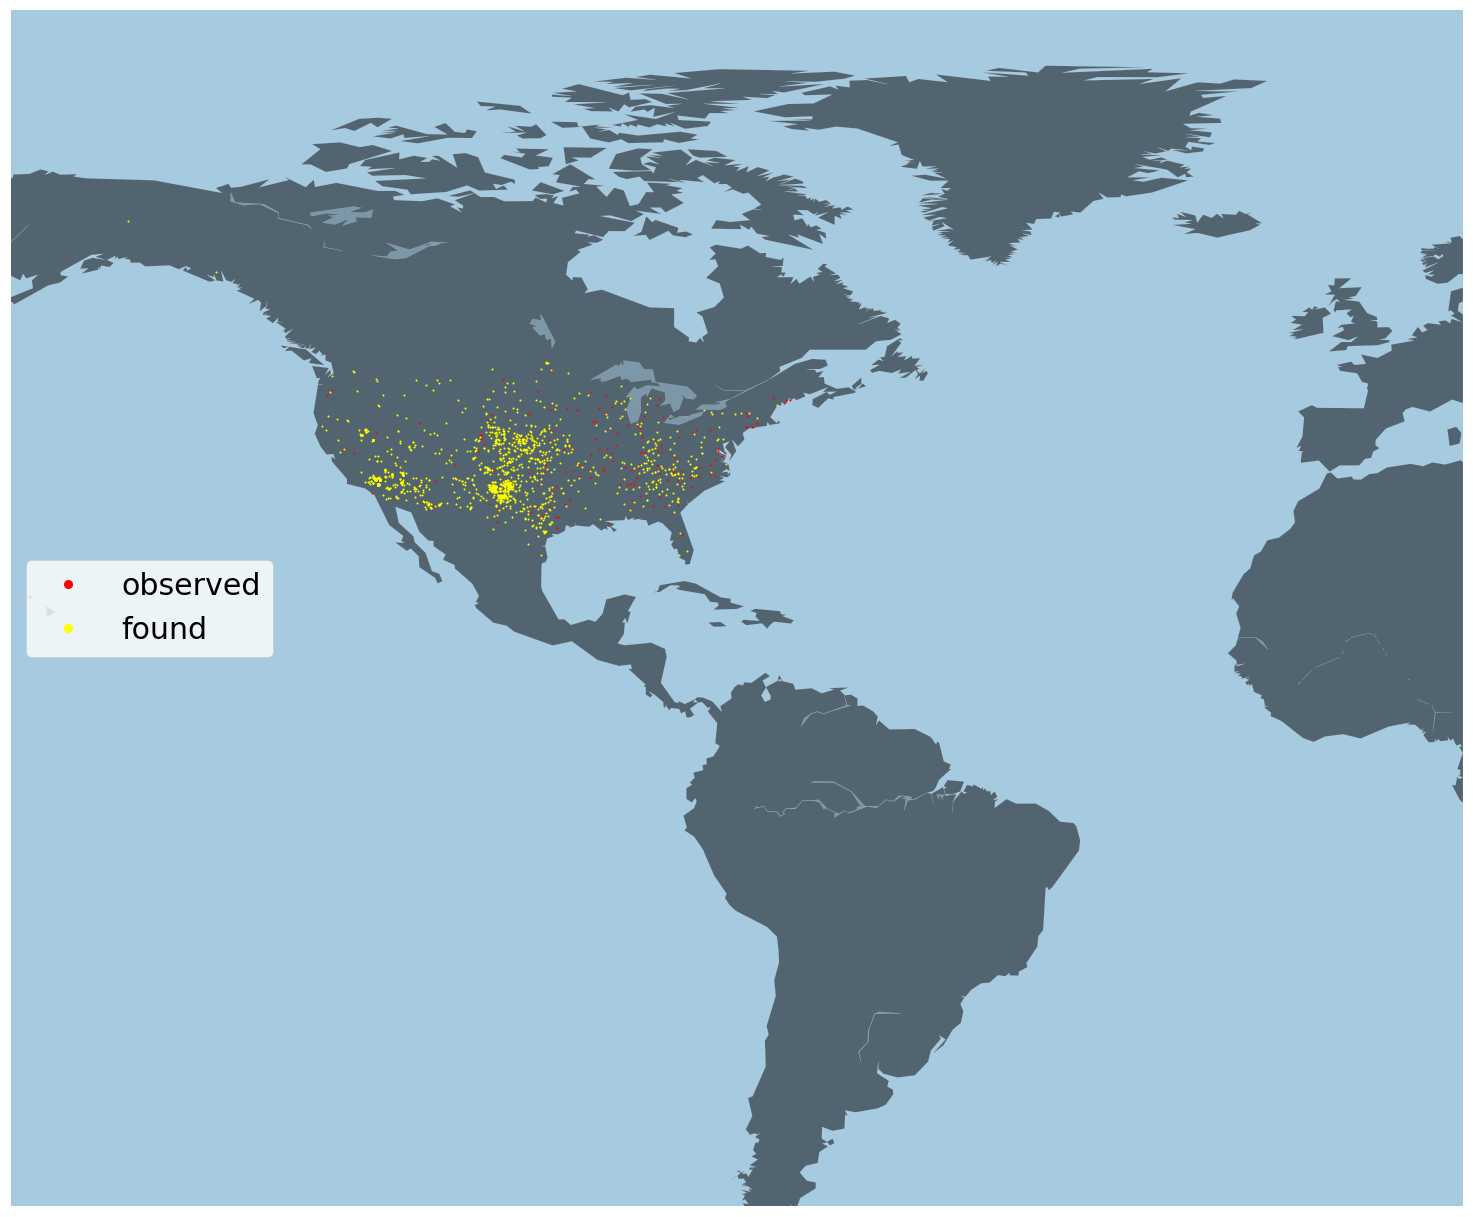

In [10]:
# #drawing the map
plt.figure(figsize=(30,22))
m=Basemap(llcrnrlon = -160, llcrnrlat = -50, urcrnrlon=10, urcrnrlat=90)
m.drawmapboundary(fill_color='#A6CAE0', linewidth = 0)
m.fillcontinents(color='black', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")


m.plot(fell['reclong'], fell['reclat'], linestyle='none', marker='o', ms=1, color='red', label='observed')
m.plot(found['reclong'], found['reclat'], linestyle='none', marker='o', ms=1, color='yellow', label='found')
plt.legend(loc=6, prop={'size': 30}, markerscale=8)

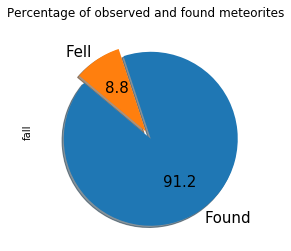

In [11]:
types = valid['fall'].value_counts()
explode = (0.1,0)
types.plot.pie(autopct='%1.1f', explode=explode, shadow = True, startangle = 140, fontsize = 15, title = 'Percentage of observed and found meteorites')

Text(-155, 10, 'linear mass scale')

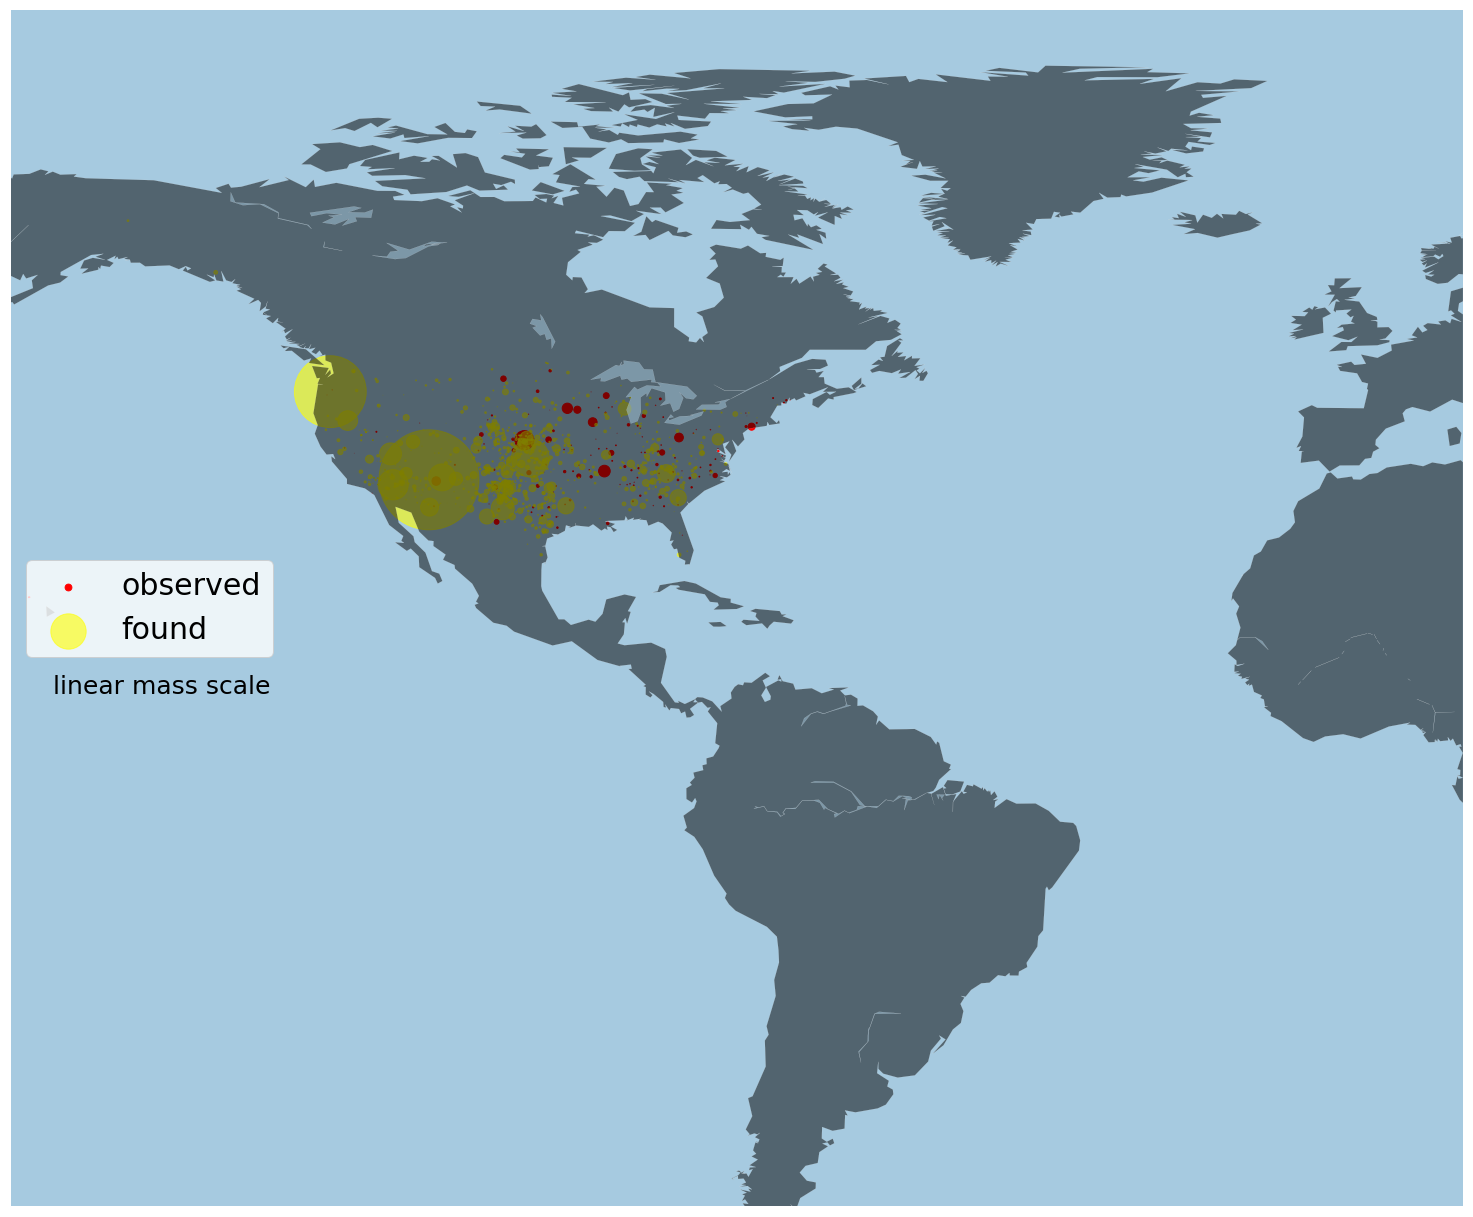

In [15]:
plt.figure(figsize=(30,22))
m=Basemap(llcrnrlon = -160, llcrnrlat = -50, urcrnrlon=10, urcrnrlat=90)
m.drawmapboundary(fill_color='#A6CAE0', linewidth = 0)
m.fillcontinents(color='black', alpha=0.5)
m.drawcoastlines(linewidth=0.1, color="white")

maxSize=valid['mass'].max()
m.scatter(fell['reclong'], fell['reclat'], marker='o', 
          s=fell['mass']/maxSize*10000, alpha=1, color='red', 
          label='observed')
m.scatter(found['reclong'], found['reclat'], marker='o', 
          s=found['mass']/maxSize*10000, alpha=0.6, color='yellow', label='found')
plt.legend(loc=6, prop={'size': 30}, markerscale=0.5)
plt.text(-155,10, 'linear mass scale', fontsize=25)